## Visual introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

car_df = pd.read_csv('./data/Cars93.csv')

In [2]:
car_df.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [3]:
car_df = car_df[['Price', 'Origin', 'Passengers']]
car_df = pd.get_dummies(car_df, columns=['Origin'], drop_first=True)

y = car_df['Price'].values
X = car_df['Origin_non-USA']
X = sm.add_constant(X)
X = X.values

In [4]:
qs = [0.1, 0.25, 0.5, 0.75, 0.9]
intercepts = []
slopes = []

for q in qs:
    qr_reg = sm.QuantReg(y,X).fit(q=q)
    intercept = round(qr_reg.params[0],4)
    slope = round(qr_reg.params[1], 4)
    
    intercepts.append(intercept)
    slopes.append(slope)
    
    print(f'q: {q}, intercept: {intercept}, slope: {slope}')

q: 0.1, intercept: 11.1, slope: -2.5
q: 0.25, intercept: 13.4991, slope: -1.8991
q: 0.5, intercept: 16.3, slope: 2.8
q: 0.75, intercept: 20.7011, slope: 5.9989
q: 0.9, intercept: 34.3, slope: -0.4


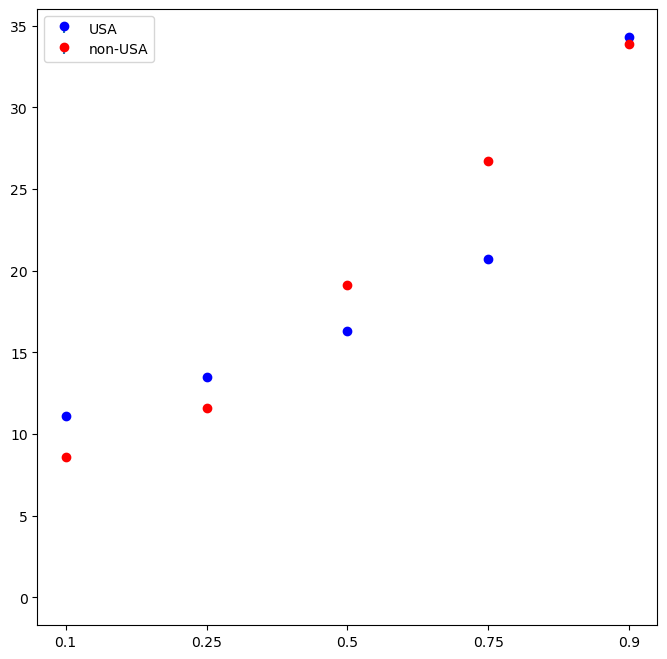

In [5]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
ax = fig.add_subplot()
stems = []
leafs1 = []
leafs2 = []

for i, q in enumerate(qs):
    stems.append(i)
    leafs1.append(intercepts[i])
    leafs2.append(intercepts[i] + slopes[i])
    
markers, stemlines, baseline = ax.stem(stems, leafs1, markerfmt='bo', label='USA')
markers2, stemlines2, baseline2 = ax.stem(stems, leafs2, markerfmt='ro', label='non-USA')

stemlines.set_visible(False)
stemlines2.set_visible(False)
baseline.set_visible(False)
baseline2.set_visible(False)

plt.legend()
plt.xticks(range(len(qs)), qs)
plt.show()

In [6]:
qs = [0.25, 0.5, 0.75]
intercepts = []
slopes = []

for q in qs:
    qr_reg = sm.QuantReg(y,X).fit(q=q)
    intercept = round(qr_reg.params[0], 4)
    slope = round(qr_reg.params[1], 4)
    
    intercepts.append(intercept)
    slopes.append(slope)
    
    print(f'q: {q}, intercept: {intercept}, slope: {slope}')
    
ols = sm.OLS(y,X).fit()
print(f'OLS-intercept: {ols.params[0]}, slope: {ols.params[1]}')

q: 0.25, intercept: 13.4991, slope: -1.8991
q: 0.5, intercept: 16.3, slope: 2.8
q: 0.75, intercept: 20.7011, slope: 5.9989
OLS-intercept: 18.572916666666664, slope: 1.935972222222227


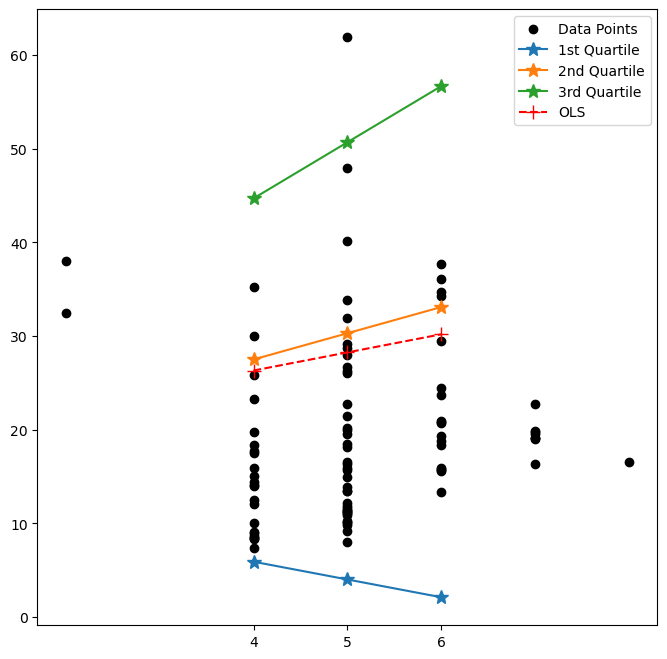

In [7]:
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
line_x = np.array([4,5,6])
labels = ['1st Quartile', '2nd Quartile', '3rd Quartile']
plt.scatter(car_df['Passengers'], car_df['Price'], color='k', label='Data Points')

for i, icpt in enumerate(intercepts):
    plt.plot(line_x, icpt+slopes[i]*line_x, marker='*', markersize=10, label=labels[i])
    
plt.plot(line_x, ols.params[0] + ols.params[1]*line_x, ls='--', color='r', marker='+', markersize=10, label='OLS')
plt.legend()
plt.xticks(range(4,len(line_x) + 4), line_x)
plt.show()

## Parameter estimation

In [8]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from scipy.optimize import linprog

In [9]:
car_df = pd.read_csv('./data/Cars93.csv')

In [10]:
car_df = car_df[['Price', 'Origin']]
car_df = pd.get_dummies(car_df, columns=['Origin'], drop_first=True)

In [11]:
y = car_df['Price'].values
X = car_df['Origin_non-USA']
X = sm.add_constant(X)
X = X.values

n = X.shape[0]
p = X.shape[1]

qs = [0.1, 0.25, 0.5, 0.75, 0.9]

for q in qs:
    A_eq = np.hstack([X, -X, np.identity(n), -np.identity(n)])
    b_eq = y
    c = np.array([0]*(2*p) + [q]*n + [1-q]*n)
    res = linprog(c, A_eq=A_eq, b_eq=b_eq, method='highs')
    
    x_plus = res.x[:p]
    x_minus = res.x[p:2*p]
    x = x_plus - x_minus
    print(f'q: {q}, intercept: {x[0]}, slope: {round(x[1],3)}')

q: 0.1, intercept: 11.1, slope: -2.5
q: 0.25, intercept: 13.5, slope: -1.9
q: 0.5, intercept: 16.3, slope: 2.8
q: 0.75, intercept: 20.7, slope: 6.0
q: 0.9, intercept: 34.3, slope: -0.4


In [12]:
np.random.seed(10)

n_sample = 10000

x = np.random.normal(10,1, n_sample)
error1 = np.random.normal(0,1,n_sample)
error2 = np.random.lognormal(0,0.25,n_sample)
error3 = np.random.lognormal(0,0.5,n_sample)
error4 = np.random.lognormal(0,1.25,n_sample)
error5 = -error4
error6 = (1+x)*error1

a_list = np.random.normal(0,1,n_sample)
rhos = [-0.2, 0.2, -0.5, 0.5]
errors = []

for rho in rhos:
    error = []
    e_cur = 0
    for a in a_list:
        e_next = rho*e_cur +a
        error.append(e_next)
        e_cur = e_next
    errors.append(error)
    
y1 = 1 + 2*x + error1
y2 = 1 + 2*x + error2
y3 = 1 + 2*x + error3
y4 = 1 + 2*x + error4
y5 = 1 + 2*x + error5
y6 = 1 + 2*x + error6
y7 = 1 + 2*x + errors[0]
y8 = 1 + 2*x + errors[1]
y9 = 1 + 2*x + errors[2]
y10 = 1 + 2*x + errors[3]

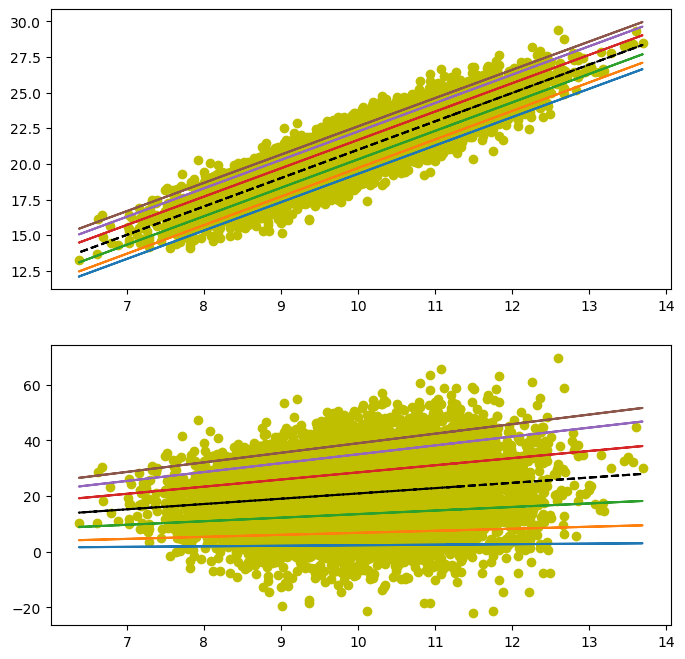

In [13]:
X = np.expand_dims(x, axis=1)
X = sm.add_constant(X)

ys = [y1, y6]
qs = [0.05, 0.1, 0.25, 0.75, 0.9, 0.95]
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

for j in range(len(ys)):
    ax_idx = 210 + j + 1
    ax = fig.add_subplot(ax_idx)
    y = ys[j]
    ax.scatter(x,y,color='y')
    
    for q in qs:
        model = sm.QuantReg(y,X).fit(q=q)
        params = model.params
        ax.plot(x, params[0] + params[1]*x)
    
    ols = sm.OLS(y,X).fit()
    ax.plot(x, ols.params[0] + ols.params[1]*x, color='k', linestyle='--')
plt.show()

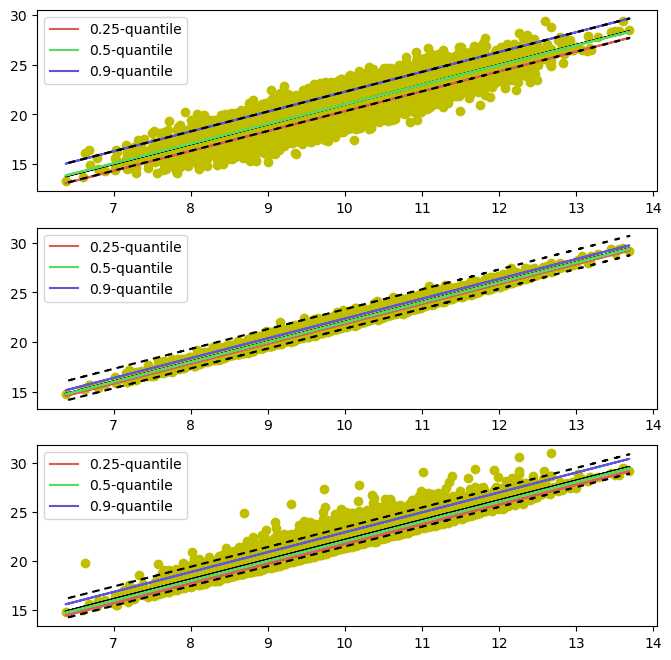

In [14]:
from scipy.stats import norm
import seaborn as sns

X = np.expand_dims(x, axis=1)
X = sm.add_constant(X)

ys = [y1, y2, y3]
qs = [0.25, 0.5, 0.9]
colors = sns.color_palette('hls', len(qs))
fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')

for j in range(len(ys)):
    ax_idx = 310 + j + 1
    ax = fig.add_subplot(ax_idx)
    y = ys[j]
    ax.scatter(x,y,color='y')
    ols = sm.OLS(y,X).fit()
    fitted = ols.fittedvalues
    ax.plot(x,fitted,color='k')
    
    for i,q in enumerate(qs):
        model = sm.QuantReg(y,X).fit(q=q)
        params = model.params
        ax.plot(x, params[0] + params[1]*x, color = colors[i], label = str(q)+'-quantile')
        if q!= 0.5:
            ax.plot(x, fitted + norm.ppf(q), color='k', linestyle=(0,(2,4)))
        ax.legend()
        
plt.show()

In [15]:
def generate_error (m,n, n_sample):
    errors = []
    a_list = np.random.normal(0,1,n_sample)
    rhos = [-0.2, 0.2, -0.5, 0.5]
    
    if m < 7:
        for a in a_list:
            errors.append(a)
            
    else:
        rho = rhos[m-7]
        e_cur = 0

        for a in a_list:
            e_next = rho * e_cur + a
            errors.append(e_next)
        errors = np.array(errors)
    
    return errors

In [16]:
from scipy.stats import lognorm
from tqdm import tqdm


np.random.seed(100)
new_x = [8,9,10,11,12]
alpha = 0.2
models = 10
z_coef = norm.ppf(1 - 0.5*alpha)
replication = 100000
header = [f'x = {j}' for j in new_x]
header = ''.join(header)
res = dict()
print(header)

for m in range(models):
    text = 'model' + str(m+1)
    res_val = []
    
    for nx in new_x:
        pred_val = 1 + 2*nx
        if m==0:
            lower = pred_val - z_coef
            upper = pred_val + z_coef
        elif m==1:
            lower = lognorm.ppf(q=0.1,s=0.25,loc=pred_val)
            upper = lognorm.ppf(q=0.9,s=0.25,loc=pred_val)
        elif m==2:
            lower = lognorm.ppf(q=0.1,s=0.5,loc=pred_val)
            upper = lognorm.ppf(q=0.9,s=0.5,loc=pred_val)
        elif m==3:
            lower = lognorm.ppf(q=0.1,s=1.25,loc=pred_val)
            upper = lognorm.ppf(q=0.9,s=1.25,loc=pred_val)
        elif m==4:
            lower = -lognorm.ppf(q=0.9,s=1.25,loc=-pred_val)
            upper = -lognorm.ppf(q=0.1,s=1.25,loc=-pred_val)
        elif m==5:
            lower = pred_val + norm.ppf(0.1,scale=1+nx)
            upper = pred_val + norm.ppf(0.9,scale=1+nx)
        else:
            temp_lower_list = []
            temp_upper_list = []
            
            for j in tqdm(range(replication), total=replication):
                temp_data = [1 + 2*nx + i for i in generate_error(m,nx,1000)]
                temp_lower = np.quantile(temp_data, 0.1)
                temp_upper = np.quantile(temp_data, 0.9)
                
                temp_lower_list.append(temp_lower)
                temp_upper_list.append(temp_upper)
                
            lower = np.mean(temp_lower_list)
            upper = np.mean(temp_upper_list)
            
        text += f'[{round(lower,2)} {round(upper,2)}] '
        
        res_val.append([round(lower,2), round(upper,2)])
    res['model' + str(m+1)] = res_val
    print(text)

x = 8x = 9x = 10x = 11x = 12
model1[15.72 18.28] [17.72 20.28] [19.72 22.28] [21.72 24.28] [23.72 26.28] 
model2[17.73 18.38] [19.73 20.38] [21.73 22.38] [23.73 24.38] [25.73 26.38] 
model3[17.53 18.9] [19.53 20.9] [21.53 22.9] [23.53 24.9] [25.53 26.9] 
model4[17.2 21.96] [19.2 23.96] [21.2 25.96] [23.2 27.96] [25.2 29.96] 
model5[12.04 16.8] [14.04 18.8] [16.04 20.8] [18.04 22.8] [20.04 24.8] 
model6[5.47 28.53] [6.18 31.82] [6.9 35.1] [7.62 38.38] [8.34 41.66] 


100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [00:56<00:00, 1774.95it/s]


model7[15.72 18.28] [17.72 20.28] [19.72 22.28] [21.72 24.28] [23.72 26.28] 


100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [01:13<00:00, 1369.19it/s]


model8[15.72 18.28] [17.72 20.28] [19.72 22.28] [21.72 24.28] [23.72 26.28] 


100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [01:12<00:00, 1382.34it/s]


model9[15.72 18.28] [17.72 20.28] [19.72 22.28] [21.72 24.28] [23.72 26.28] 


100%|████████████████████████████████████████████████████████████████████████| 100000/100000 [01:12<00:00, 1377.52it/s]

model10[15.72 18.28] [17.72 20.28] [19.72 22.28] [21.72 24.28] [23.72 26.28] 


In [17]:
np.random.seed(100)

n_sample = 1000
x = np.random.normal(10,1,n_sample)
replication = 1000
models = 10
theta1 = 0.1
theta2 = 0.9
alpha = 0.2
z_coef = norm.ppf(1 - 0.5*alpha)
new_x = [8,9,10,11,12]
header = [f'x = {j}' for j in new_x]
header = ''.join(header)
print(header)

for m in range(models):
    qr_text = 'model' + str(m+1) + ' QR '
    ls_text = 'model' + str(m+1) + ' LS '
    
    error = generate_error(m,x,n_sample)
    y = 1 + 2*x + error
    X = np.expand_dims(x, axis=1)
    X = sm.add_constant(X)
    
    ols = sm.OLS(y,X).fit()
    model1 = sm.QuantReg(y,X).fit(q=theta1)
    params1 = model1.params
    
    model2 = sm.QuantReg(y,X).fit(q=theta2)
    params2 = model2.params
    
    for i,nx in enumerate(new_x):
        lower = round(params1[0] + params1[1]*nx, 2)
        upper = round(params2[0] + params2[1]*nx, 2)
        
        qr_text += str([lower,upper]) + ''
        std = np.sqrt(ols.mse_resid*(1+1/n_sample+np.square(nx-np.mean(x))/np.sum(np.square(x-np.mean(x)))))
        pred_val = ols.params[0] + ols.params[1]*nx
        lp = pred_val - z_coef*std
        up = pred_val + z_coef*std
        
        ls_text += str([round(lp,2), round(up,2)]) + ''
        
    print(ls_text)
    print(qr_text)

x = 8x = 9x = 10x = 11x = 12
model1 LS [15.72, 18.31][17.72, 20.31][19.72, 22.3][21.71, 24.3][23.71, 26.29]
model1 QR [15.98, 18.32][17.89, 20.31][19.8, 22.3][21.71, 24.3][23.63, 26.29]
model2 LS [15.86, 18.41][17.83, 20.38][19.8, 22.35][21.77, 24.32][23.73, 26.29]
model2 QR [15.9, 18.23][17.84, 20.29][19.78, 22.35][21.72, 24.41][23.66, 26.47]
model3 LS [15.64, 18.31][17.65, 20.32][19.66, 22.32][21.67, 24.33][23.68, 26.34]
model3 QR [15.61, 18.24][17.66, 20.27][19.7, 22.3][21.74, 24.33][23.78, 26.36]
model4 LS [15.59, 18.15][17.65, 20.21][19.71, 22.27][21.76, 24.33][23.82, 26.39]
model4 QR [15.46, 18.25][17.56, 20.26][19.66, 22.26][21.76, 24.26][23.86, 26.27]
model5 LS [15.73, 18.3][17.7, 20.26][19.67, 22.23][21.64, 24.2][23.61, 26.17]
model5 QR [15.79, 18.19][17.72, 20.23][19.65, 22.27][21.58, 24.31][23.5, 26.35]
model6 LS [15.68, 18.17][17.7, 20.19][19.72, 22.21][21.74, 24.23][23.75, 26.25]
model6 QR [15.61, 18.19][17.66, 20.19][19.72, 22.19][21.77, 24.18][23.82, 26.18]
model7 LS [15